# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy.spatial import ConvexHull

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
totaldata = pd.read_csv('train.csv', index_col=0)
totaldata

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
train = totaldata.sample(frac=0.7, random_state=0)
test = totaldata.drop(train. index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [5]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [6]:
processed_train = get_features_and_target(train)
processed_test = get_features_and_target(test)
processed_train

(             Pclass     Sex   Age  SibSp  Parch      Fare
 PassengerId                                              
 496               3    male   NaN      0      0   14.4583
 649               3    male   NaN      0      0    7.5500
 279               3    male   7.0      4      1   29.1250
 32                1  female   NaN      1      0  146.5208
 256               3  female  29.0      0      2   15.2458
 ...             ...     ...   ...    ...    ...       ...
 825               3    male   2.0      4      1   39.6875
 147               3    male  27.0      0      0    7.7958
 290               3  female  22.0      0      0    7.7500
 30                3    male   NaN      0      0    7.8958
 115               3  female  17.0      0      0   14.4583
 
 [624 rows x 6 columns],
 PassengerId
 496    0
 649    0
 279    0
 32     1
 256    1
       ..
 825    0
 147    1
 290    1
 30     0
 115    0
 Name: Survived, Length: 624, dtype: int64)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

             Survived  Pclass     Sex   Age  SibSp  Parch      Fare
PassengerId                                                        
496                 0       3    male   NaN      0      0   14.4583
649                 0       3    male   NaN      0      0    7.5500
279                 0       3    male   7.0      4      1   29.1250
32                  1       1  female   NaN      1      0  146.5208
256                 1       3  female  29.0      0      2   15.2458
...               ...     ...     ...   ...    ...    ...       ...
825                 0       3    male   2.0      4      1   39.6875
147                 1       3    male  27.0      0      0    7.7958
290                 1       3  female  22.0      0      0    7.7500
30                  0       3    male   NaN      0      0    7.8958
115                 0       3  female  17.0      0      0   14.4583

[624 rows x 7 columns]


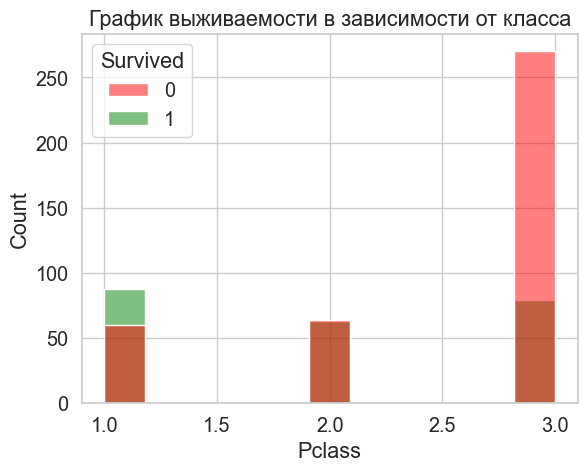

In [7]:
processed_train_2 = pd.merge(left=processed_train[1],
                             right=processed_train[0],
                             how='inner',
                             on='PassengerId')
print(processed_train_2)
figure = sns.histplot(x='Pclass',
                      hue='Survived',
                      data=processed_train_2,
                      palette=['#ff0000', '#008000'])
figure.set_title("График выживаемости в зависимости от класса")
plt.show()

Из первого графика видим, что чем меньше номер класса (т.е. чем класс лучше), тем больше шансов на выживание.

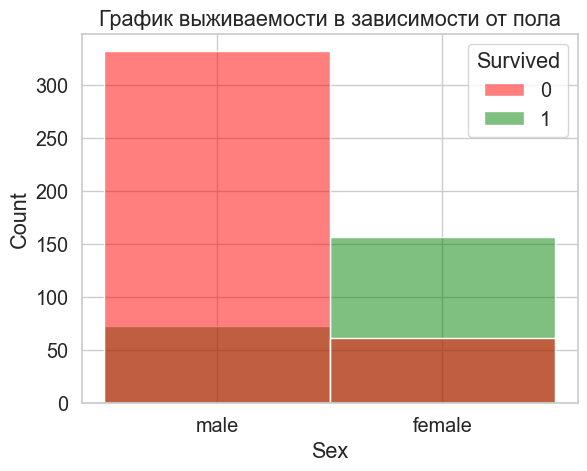

In [8]:
figure = sns.histplot(x='Sex',
                      hue='Survived',
                      data=processed_train_2,
                      palette=['#ff0000', '#008000'])
figure.set_title("График выживаемости в зависимости от пола")
plt.show()

Из второго графика видим, что шансов выжить на Титанике у женщины намного больше, чем у мужчины.

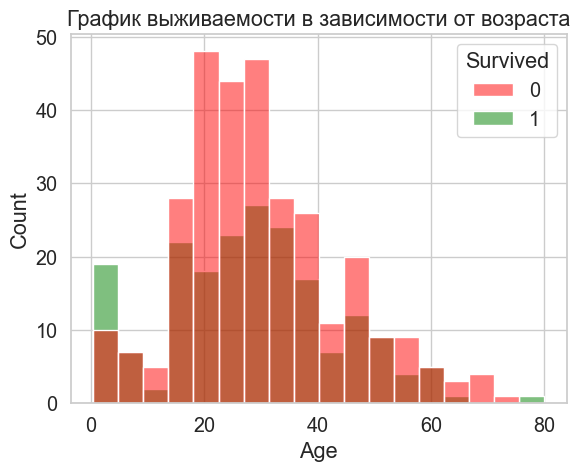

In [9]:
figure = sns.histplot(x='Age',
                      hue='Survived',
                      data=processed_train_2,
                      palette=['#ff0000', '#008000'])
figure.set_title("График выживаемости в зависимости от возраста")
plt.show()

Из третьего графика видим, что среди детей была спасена большая доля, чем среди взрослых. 

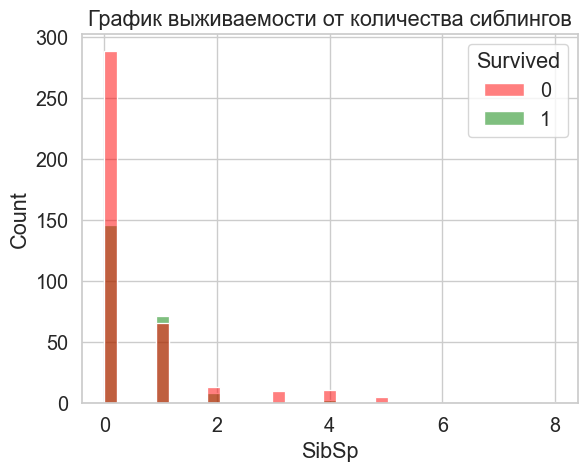

In [10]:
figure = sns.histplot(x='SibSp',
                      hue='Survived',
                      data=processed_train_2,
                      palette=['#ff0000', '#008000'])
figure.set_title("График выживаемости от количества сиблингов")
plt.show()

Из четвертого графика видим, что если у пассажира на борту Титаника находились один или два сиблинга (брат/сестра/супруг), то у него больше шансов выжить, чем у всех остальных.

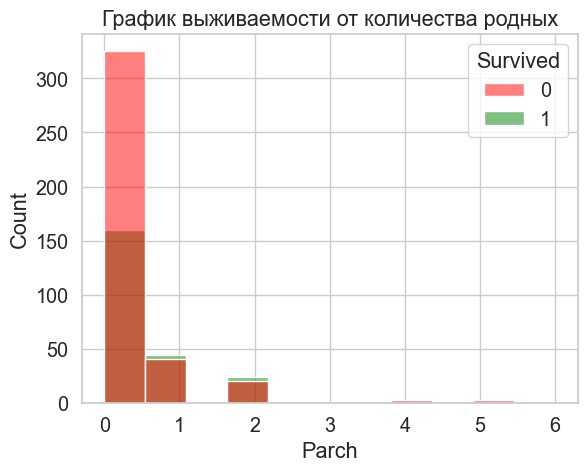

In [11]:
figure = sns.histplot(x='Parch',
                      hue='Survived',
                      data=processed_train_2,
                      palette=['#ff0000', '#008000'])
figure.set_title("График выживаемости от количества родных")
plt.show()

Из пятого графика видим, что если у пассажира на борту Титаника находился кто-то из родителей/детей, то у него больше шансов выжить, чем у всех остальных.

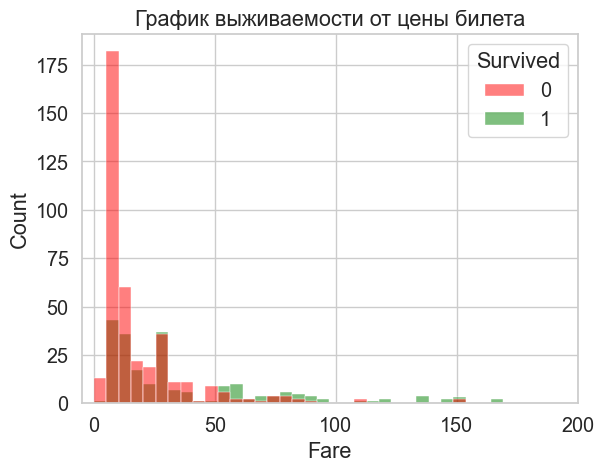

In [12]:
figure = sns.histplot(x='Fare',
                      hue='Survived',
                      data=processed_train_2,
                      palette=['#ff0000', '#008000'])
plt.xlim((-5, 200))
figure.set_title("График выживаемости от цены билета")
plt.show()

Из шестого графика видим, что с ростом цены на билет растут шансы на выживание на Титанике. Люди с самыми дешёвыми билетами почти не выживали.

Выводы: дети выживают чаще взрослых, женщины выживают чаще мужчин, богатые (1 класс, дорогой билет) выживают чаще бедных, наличие родственников на титанике повышает шансы на выживание.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Если пассажир в 3 классе, то он умер. Если пассажир в 1 или 2 классе, он является мужчиной, то он умер. Если пассажир в 1 или 2 классе, является женщиной, то выжил. Если пассажир в 1 или 2 классе, пол не известен, то он выжил. 

**Дерево 2:**

Если пассажир купил билет дороже 50, то выжил. Иначе умер.

Реализуйте полученные деревья по шаблону

In [13]:
def tree_1(features: pd.DataFrame) -> pd.Series:
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    features['PredictedSurvived'] = np.nan
    features.loc[features['Pclass'] == 3, 'PredictedSurvived'] = 0
    features.loc[features['Pclass'] == 1, 'PredictedSurvived'] = 1
    features.loc[features['Pclass'] == 2, 'PredictedSurvived'] = 1
    features.loc[features['Sex'] == 'male', 'PredictedSurvived'] = 0
    predicted = features.drop(['Survived', 'Pclass',
                               'Sex', 'Age',
                               'SibSp', 'Parch',
                               'Fare'], axis=1).squeeze()
    return predicted

In [14]:
def tree_2(features: pd.DataFrame) -> pd.Series:
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    features['PredictedSurvived'] = np.nan
    features.loc[features['Fare'] > 50, 'PredictedSurvived'] = 1
    features.loc[features['Fare'] <= 50, 'PredictedSurvived'] = 0
    predicted = features.drop(['Survived', 'Pclass',
                               'Sex', 'Age',
                               'SibSp', 'Parch',
                               'Fare'], axis=1).squeeze()

    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Процент успешно предсказанных значений колонки Survived, без учета всех колонок со значением NaN.

Реализуйте данный критерий по шаблону

In [15]:
def criteria(target: pd.DataFrame, predicted: pd.Series) -> float:
    '''
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    criteria_data = pd.merge(left=target, right=predicted, how='inner', on='PassengerId')
    return int((criteria_data.query('Survived == PredictedSurvived').shape[0] * 100) / (criteria_data.shape[0]))

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [16]:
processed_test_2 = pd.merge(left=processed_test[1],
                            right=processed_test[0],
                            how='inner',
                            on='PassengerId')
print(criteria(processed_test[1], tree_1(processed_test_2)))
print(criteria(processed_test[1], tree_2(processed_test_2)))

73
64


Оценим качество полученных ранее деревьев. Мы не проверяем на соответствие угаданного значения реальности, если не известно реальное значение Survived. Survived может принимать только 2 значения, поэтому мы хотим угадывать не менее, чем в 50% случаев. При анализе по первому решающему дереву получилась точность 73%, по второму решающему дереву получилась точность 64%. Анализ на основе двух признаков дал более хорошие результаты. С помощью данных деревьев нельзя точно спрогнозировать значение Survived у пассажира, однако замеченные закономерности сработали и для тестовых данных.

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [17]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    '''
    Функция find_nearest_points выполняет поиск k ближайших соседей
    точек из множества B среди точек из множества A.
    множество A размерности n×d, множество B размерности m×d.
    '''
    n = A.shape[0]
    square_dist = np.sum((B[:, np.newaxis, :] - A[np.newaxis, :, :]) ** 2,
                         axis=-1)
    # Матрица с попарными квадратами расстояний.
    nearest = np.argsort(square_dist, axis=1)
    R = np.linspace(k, n - 1, n - k).astype("int")  # числа с индексами от k до n-1
    answ = np.delete(nearest, R, 1)
    return answ

In [18]:
def knn(features: pd.DataFrame, train_features: pd.DataFrame,
        train_target: pd.DataFrame, k=1) -> pd.Series:
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    processed_train_2 = pd.merge(left=train_target, right=train_features,
                                 how='inner', on='PassengerId')
    processed_train_2 = processed_train_2.dropna(subset=['Pclass', 'Sex',
                                                         'Age', 'SibSp',
                                                         'Parch', 'Fare'])
    # Удалили те строки, где параметры для поиска вектора расстояния принимают значения NaN.
    processed_train_2['Survived'] = processed_train_2['Survived']. fillna(1 / 2)
    # NaN в Survived заменили на 1/2

    train_features.loc[train_features['Sex'] == 'female', 'Sex'] = 1
    train_features.loc[train_features['Sex'] == 'male', 'Sex'] = 0
    features.loc[features['Sex'] == 'female', 'Sex'] = 1
    features.loc[features['Sex'] == 'male', 'Sex'] = 0
    # Заменили пол на числа, возможно надо выбирать другие числа.

    train_features = train_features.dropna()
    features = features.dropna()
    # Удалили те строки, где параметры для поиска вектора расстояния принимают значения NaN.

    A = train_features.to_numpy()
    B = features.to_numpy()
    C = find_nearest_points(A, B, k)  # нашли соседей для каждого из B среди A.
    D = C.astype('float')  # здесь будут значения Survived (0, 1 и 1/2 при NaN) у соседей.
    averega_surv = 0  # здесь будет среднее значение Survived соседей = PredictedSurvived.
    predicted_list = []
    for i in range(0, C.shape[0]):
        for j in range(0, C.shape[1]):
            D[i][j] = processed_train_2.iloc[C[i][j]]['Survived']
            averega_surv += D[i][j] / k
        predicted_list.append(int(averega_surv + 0.5))
        # находим среднее среди соседей и округляем по математическим правилам.
        # 0.5 округляется до 1,
        # т.е. те, у кого все соседи NaN или равное кол-во соседей 2-х видов,
        # считаются выжившими
        averega_surv = 0
    # Добавим подходящие индексы к колонке PredictedSurvived.
    features.loc[:, "PredictedSurvived"] = predicted_list
    predicted = features.drop(['Pclass', 'Sex',
                               'Age', 'SibSp',
                               'Parch', 'Fare'],
                              axis=1).squeeze()
    return predicted


pd.options.mode.chained_assignment = None

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

In [19]:
Criteria_from_k = pd.DataFrame({'k': [], 'Criteria': []})
for k in range(1, 11):
    Criteria_from_k.at[k, 'k'] = k
    Criteria_from_k.at[k, 'Criteria'] = criteria(processed_test[1],
                                                 knn(processed_test[0],
                                                     processed_train[0],
                                                     processed_train[1], k))

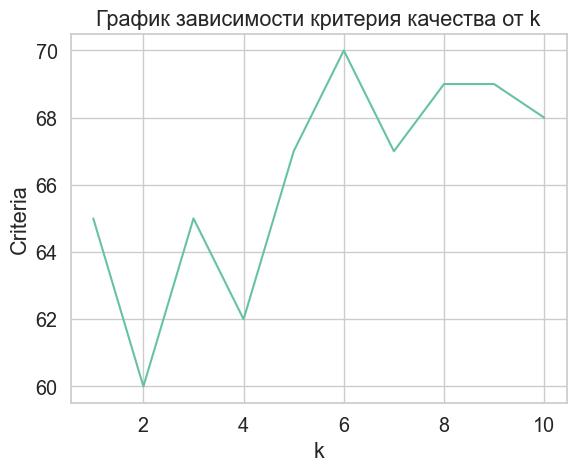

In [20]:
figure = sns.lineplot(data=Criteria_from_k, x='k', y='Criteria')
figure.set_title("График зависимости критерия качества от k")
plt.show()

#### 6. Выводы

С помощью метода на основе поиска ближайших соседей получилось примерно с точностью 70% (при k=6) предсказать значение Survived. Видно, что с ростом количества соседей увеличивается точность, однако при слишком большом количестве соседей точность падает, т.к. все соседи в текущей модели влияют на предсказываемое значение с одинаковым весом. Повысить точность можно более аккуратным подбором координат точек, отвечающих за свойства пассажиров. Например, сейчас пол принимает значения 0 или 1, что достаточно незначительно по сравнению со стоимостью билета.

Получилось, что на основе свойств пассажира можно предсказывать значение Survived с точностью около 70% и выше, используя решающие деревья или метод ближайшего соседа. Если доработать эти методы, совместить их, то можно получить достаточно точную оценку исследуемого значения.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

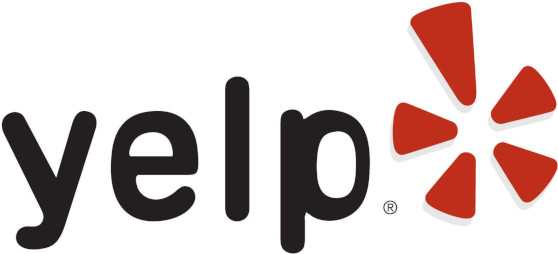

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [21]:
yelp_business = pd.read_csv('yelp_business.csv', index_col=0)
yelp_business = yelp_business.drop(['neighborhood', 'postal_code',
                                    'is_open'], axis=1)
yelp_business.head(5)

,business_id,name,address,city,state,latitude,longitude,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,33.330690,-111.978599,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,40.291685,-80.104900,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,33.524903,-112.115310,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,33.383147,-111.964725,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,41.119535,-81.475690,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [22]:
largest_cities = yelp_business.drop(['name', 'address',
                                    'state', 'latitude', 'longitude', 'categories'], axis=1)
# Остался список из business_id и city.
largest_cities = largest_cities.groupby(["city"]).count()
largest_cities.reset_index(inplace=True)
# Меняем название колонки business_id, т.к. там теперь лежит количество уникальных id в городах.
largest_cities.rename(columns={'business_id': 'business_count'}, inplace=True)
# Сортируем по убыванию количества компаний в городе.
largest_cities = largest_cities.sort_values(by=['business_count'], ascending=False)
# Оставляем только топ 5.
largest_cities = largest_cities.head(5)
largest_cities

,city,business_count
424,Las Vegas,26775
713,Phoenix,17213
983,Toronto,17206
143,Charlotte,8553
871,Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

Видим, что город `N` &mdash; Las Vegas. В нем 26775 компаний.

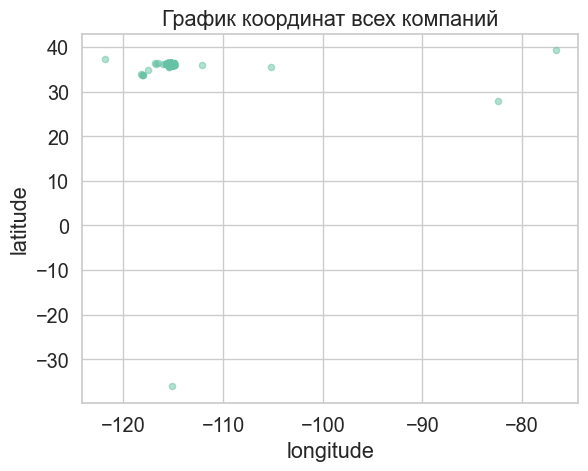

In [23]:
N = largest_cities.iloc[0]['city']
yelp_business_N = yelp_business.loc[yelp_business['city'] == N]
yelp_business_N.plot.scatter(x="longitude", y="latitude", alpha=0.5)
plt.title("График координат всех компаний")
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

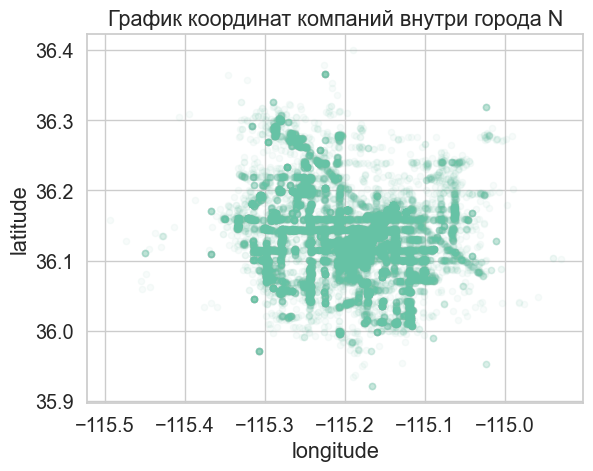

In [24]:
yelp_business_N = yelp_business_N[yelp_business_N.longitude > -115.5]
yelp_business_N = yelp_business_N[yelp_business_N.longitude < -114.9]
yelp_business_N = yelp_business_N[yelp_business_N.latitude > 35.8]
yelp_business_N = yelp_business_N[yelp_business_N.latitude < 36.4]
yelp_business_N_points = yelp_business_N.drop(['business_id', 'name',
                                               'address', 'city',
                                               'state', 'categories'], axis=1)
yelp_business_N_points.plot.scatter(x="longitude", y="latitude", alpha=0.05)
plt.title("График координат компаний внутри города N")
plt.show()

Видим, что у Лас-Вегаса долгота -115.2 +- 0.3, широта 36.1 +-0.3, на графике выделяются некоторые улицы. Осталось 26722 компании.

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [25]:
# Функция рисования точек на карте
def draw_points(map_object, list_of_points, layer_name, line_color, fill_color, text):

    fg = folium.FeatureGroup(name=layer_name)

    for point in list_of_points:
        fg.add_child(
            folium.CircleMarker(
                point,
                radius=1,
                color=line_color,
                fill_color=fill_color,
                popup=(folium.Popup(text)),
            )
        )

    map_object.add_child(fg)

Подготовили функцию для рисования точек на карте.

In [26]:
# Создаем граничную фигуру
def create_envelope_polygon(
    map_object, list_of_points, layer_name, line_color, fill_color, weight, text
):

    # Находим края граничной фигуры
    from operator import itemgetter

    list_of_points = sorted(list_of_points, key=itemgetter(0))
    x_min = list_of_points[0]
    x_max = list_of_points[len(list_of_points) - 1]

    list_of_points = sorted(list_of_points, key=itemgetter(1))
    y_min = list_of_points[0]
    y_max = list_of_points[len(list_of_points) - 1]

    upper_left = (x_min[0], y_max[1])
    upper_right = (x_max[0], y_max[1])
    lower_right = (x_max[0], y_min[1])
    lower_left = (x_min[0], y_min[1])

    edges = [upper_left, upper_right, lower_right, lower_left]

    fg = folium.FeatureGroup(name=layer_name)
    fg.add_child(
        folium.vector_layers.Polygon(
            locations=edges,
            color=line_color,
            fill_color=fill_color,
            weight=weight,
            popup=(folium.Popup(text)),
        )
    )
    map_object.add_child(fg)

    return map_object

Подготовили функцию для рисования границы города на карте.

In [27]:
# Создаем карту
my_map = folium.Map(location=[36.175, -115.137], zoom_start=10, min_zoom=9)

# Уменьшаем количество точек, чтобы html карты весил меньше 20 мб.
# Оставили 19000 точек из 26722, оставшихся в границах города.
yelp_business_N_points = yelp_business_N_points.sample(n=19000)
# Делаем dataframe list-ом.
list_of_points = yelp_business_N_points.values.tolist()

create_envelope_polygon(
    my_map,
    list_of_points,
    layer_name="Граница города",
    line_color="indianred",
    fill_color="red",
    weight=5,
    text="Граница города",
)

draw_points(
    my_map,
    list_of_points,
    layer_name="Компании",
    line_color="darkred",
    fill_color="darkred",
    text="Компании",
)

# Добавление управления слоями, показ и сохранение карты.
folium.LayerControl(collapsed=False).add_to(my_map)
# my_map
my_map.save('map.html')

Построили карту, отрисовали точки и границу Лас-Вегаса.

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [28]:
yelp_review = pd.read_csv('yelp_review.csv', index_col=0)

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [29]:
yelp_review = yelp_review.set_index('business_id')
yelp_review = yelp_review.loc[yelp_business_N.business_id]
yelp_review.reset_index(inplace=True)

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [30]:
unique_business = yelp_review.groupby(['business_id']).aggregate({"stars": [np.mean, np.size]})

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [31]:
unique_business.columns = ['avg_star', 'mark_count']
unique_business.head(5)

,avg_star,mark_count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [32]:
yelp_business_N = yelp_business_N.set_index('business_id')
all_business_info = yelp_business_N.join(unique_business, how='left', sort=False)
all_business_info = all_business_info.drop(['address', 'city', 'state'], axis=1)
all_business_info.head(5)

,name,latitude,longitude,categories,avg_star,mark_count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.197484,-115.249660,Shopping;Sporting Goods,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

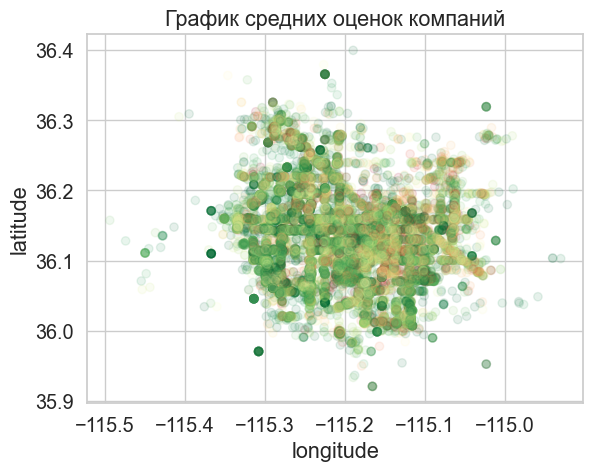

In [33]:
plt.scatter(all_business_info.longitude,
            all_business_info.latitude,
            c=all_business_info.avg_star,
            cmap='RdYlGn', alpha=0.1)
plt.title("График средних оценок компаний")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [34]:
# Копируем данные, чтобы не округлять координаты в all_business_info
busn_inf_area = all_business_info.copy()
busn_inf_area['latitude'] = busn_inf_area['latitude'] * 4
busn_inf_area['longitude'] = busn_inf_area['longitude'] * 4
busn_inf_area = busn_inf_area.round({'latitude': 1, 'longitude': 1})
busn_inf_area['latitude'] = busn_inf_area['latitude'] * 0.25
busn_inf_area['longitude'] = busn_inf_area['longitude'] * 0.25
busn_inf_area.head(5)

,name,latitude,longitude,categories,avg_star,mark_count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.200,-115.275,Real Estate Services;Real Estate;Home Services...,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.200,-115.250,Shopping;Sporting Goods,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",36.075,-115.125,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",36.050,-115.275,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",36.100,-115.050,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

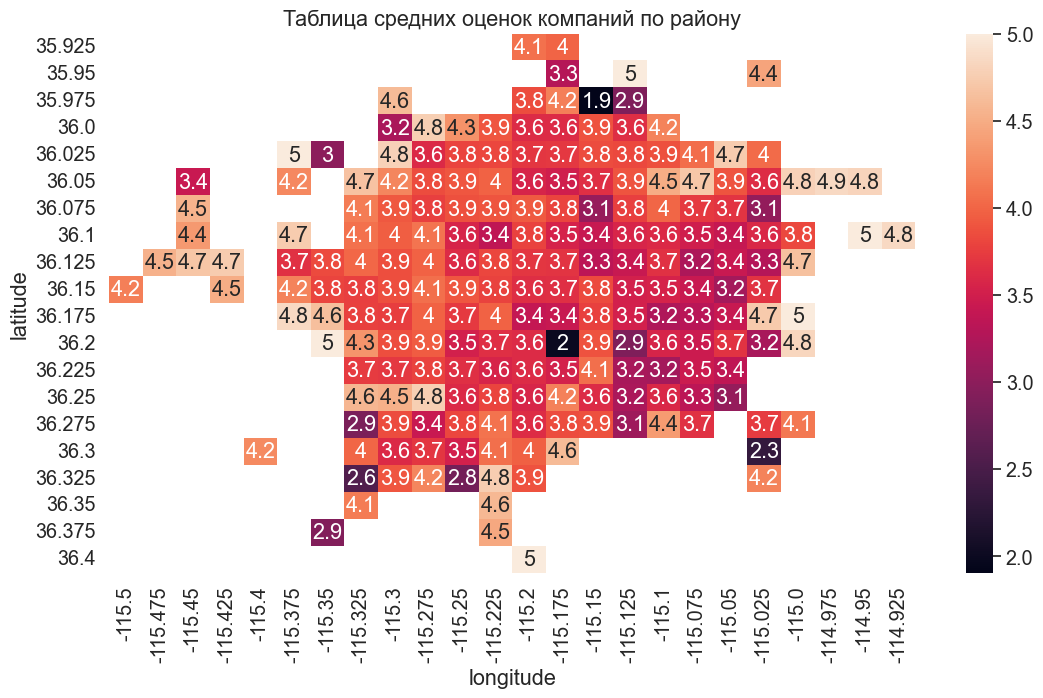

In [35]:
pivot_table = pd.pivot_table(data=busn_inf_area, values='avg_star',
                             index='latitude', columns='longitude', aggfunc=np.mean)
f, ax = plt.subplots(figsize=(13, 7))
figure = sns.heatmap(data=pivot_table, annot=True)
plt.title("Таблица средних оценок компаний по району")
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Нет смысла оценивать район с маленьким количеством компаний, потому что такая оценка будет совсем случайной, так как слишком зависит от конкретных заведений. Может получиться так, что район с одним заведением с оценкой 5 лучше, чем район с сотней заведений со средней оценкой 4.5, в таком случае так сравнивать эти районы некорректно.
Также плохо, если цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки. Например, если в таблице есть только районы с оценками заведений от 4 до 5, то районы с оценкой 4 будут покрашены в максимально плохой цвет. Однако 4 намного лучше, чем возможная оценка 2 (которую ставят в других городах), поэтому хотелось бы, чтобы в этой ситуации районы с оценкой 4 были покрашены в позитивный цвет. Для этого нужно выставлять крайние значения для цветовой карты.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

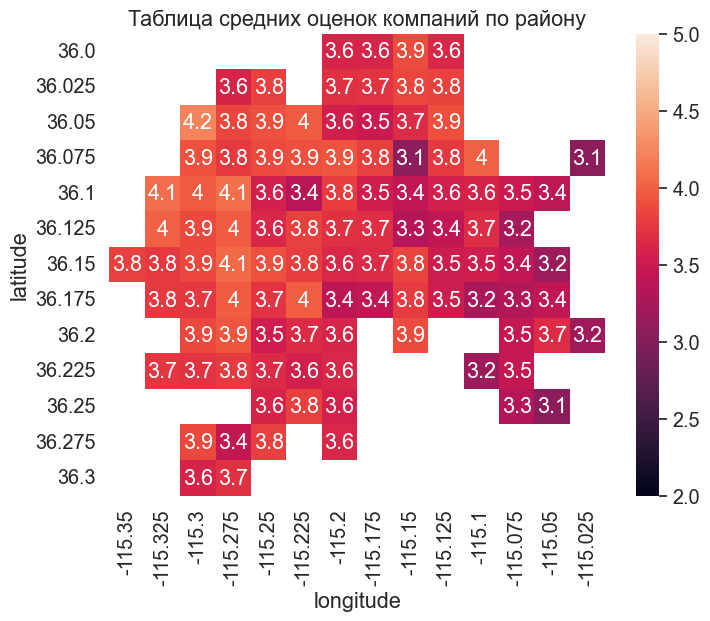

In [36]:
# делаем business_id снова столбцом.
busn_inf_area.reset_index(inplace=True)
all_business_info.reset_index(inplace=True)
# делаем latitude, longitude индексами; считаем кол-во соответствий им.
big_area_busn = busn_inf_area.groupby(['latitude',
                                       'longitude']).aggregate({"business_id": [np.size]})
# Переименовываем колонку с количеством бизнесов района.
big_area_busn.columns = ['busn_count']
# Оставляем районы, в которых имеется информация о не менее 30 компаний.
big_area_busn = big_area_busn.loc[(big_area_busn['busn_count'] >= 30)]
# делаем latitude, longitude индексами во 2-й таблице.
busn_inf_area = busn_inf_area.set_index(['latitude', 'longitude'])
# Соединяем таблицы по пересечению.
big_area_busn = big_area_busn.join(busn_inf_area, how='inner', sort=False)
# делаем latitude и longitude снова столбцами.
busn_inf_area.reset_index(inplace=True)
big_area_busn.reset_index(inplace=True)
# удаляем busn_count у каждой из фирм, остались только фирмы из больших районов.
big_area_busn = big_area_busn.drop('busn_count', axis=1)
# Строим сводную таблицу.
pivot_table = pd.pivot_table(data=big_area_busn, values='avg_star',
                             index='latitude', columns='longitude', aggfunc=np.mean)
# Изображаем таблицу без подстройки цветовой гаммы под минимальное и максимальное значения.
f, ax = plt.subplots(figsize=(8, 6))
figure = sns.heatmap(data=pivot_table, annot=True, vmin=2, vmax=5)
plt.title("Таблица средних оценок компаний по району")
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Мы убрали все районы, где средняя оценка определялась маленьким количеством заведений, поэтому не могла справедливо характеризовать район. Видим, что в последнем графике отсутствуют все те районы, где средняя оценка была выше 4.3 или ниже 3.0. Так получилось, потому что в одном месте чаще всего все заведения не могут быть очень хорошими или очень плохими, если их там достаточно много.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

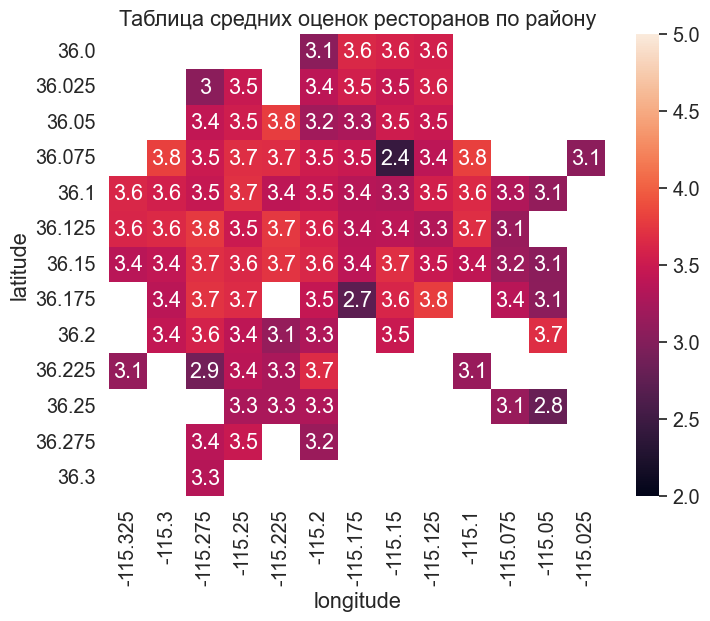

In [37]:
# Оставляем бизнесы c не менее,чем 5 отзывами.
popular_rest = busn_inf_area.loc[busn_inf_area['mark_count'] >= 5]
# Все в поле categories теперь будет написано с маленькими буквами.
popular_rest['categories'] = popular_rest['categories'].str.lower()
# Оставляем только рестараны.
mask_rest = popular_rest["categories"].str.contains(r".*restaurant.*")
popular_rest = popular_rest.loc[mask_rest]

# делаем latitude, longitude индексами; считаем кол-во соответствий им.
big_area_popul_rest = popular_rest.groupby(['latitude',
                                            'longitude']).aggregate({"business_id": [np.size]})
# Переименовываем колонку с количеством бизнесов района.
big_area_popul_rest.columns = ['busn_count']
# Оставляем районы, в которых имеется информация о не менее 10 ресторанах.
big_area_popul_rest = big_area_popul_rest.loc[(big_area_popul_rest['busn_count'] >= 10)]
# делаем latitude, longitude индексами во 2-й таблице.
popular_rest = popular_rest.set_index(['latitude', 'longitude'])
# Соединяем таблицы по пересечению.
big_area_popul_rest = big_area_popul_rest.join(popular_rest, how='inner', sort=False)
# делаем latitude и longitude снова столбцами.
popular_rest.reset_index(inplace=True)
big_area_popul_rest.reset_index(inplace=True)
# удаляем busn_count у каждой из фирм, остались только фирмы из больших районов.
big_area_popul_rest = big_area_popul_rest.drop('busn_count', axis=1)

# Строим сводную таблицу.
pivot_table = pd.pivot_table(data=big_area_popul_rest, values='avg_star',
                             index='latitude', columns='longitude', aggfunc=np.mean)
# Изображаем таблицу без подстройки цветовой гаммы под минимальное и максимальное значения.
f, ax = plt.subplots(figsize=(8, 6))
figure = sns.heatmap(data=pivot_table, annot=True, vmin=2, vmax=5)
plt.title("Таблица средних оценок ресторанов по району")
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Не факт, что ресторан с 3 отзывами со средней оценкой 5 лучше, чем ресторан со 100 отзывами и средней оценкой 4.5. Если ресторан хороший и в городе, то обычно у него нормальное количество посетителей и отзывов. Маленькое количество отзывов также не гарантирует справедливую оценку ресторана.

Нет смысла оценивать район с маленьким количеством ресторанов, потому что такая оценка будет совсем случайной, так как слишком зависит от конкретных ресторанов. Может получиться так, что район с одним заведением со средней оценкой 5 лучше, чем район с сотней заведений со средней оценкой 4.5, в таком случае так сравнивать эти районы некорректно.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [38]:
# Оставляем бизнесы c не менее,чем 50 отзывами.
popular_rest = all_business_info.loc[all_business_info['mark_count'] >= 50]
# Все в поле categories теперь будет написано с маленькими буквами.
popular_rest['categories'] = popular_rest['categories'].str.lower()
# Оставляем только рестараны.
mask_rest = popular_rest["categories"].str.contains(r".*restaurant.*")
popular_rest = popular_rest.loc[mask_rest]

popular_rest = popular_rest.sort_values(by=['avg_star'], ascending=False)
top_10_restaurants = popular_rest.head(10)
top_10_restaurants

,business_id,name,latitude,longitude,categories,avg_star,mark_count
3607,iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",36.114537,-115.172678,food tours;restaurants;event planning & servic...,4.966480,179
25432,Fmij544FE1iOruoxI41kew,"""Pepito Shack""",36.152477,-115.151945,restaurants;burgers;food stands;sandwiches;hot...,4.907692,65
16634,qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",36.125960,-115.184846,vietnamese;bubble tea;sandwiches;food;coffee &...,4.890909,55
25755,k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",36.166783,-115.286197,tacos;street vendors;farmers market;vegetarian...,4.868132,91
2133,IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",36.054195,-115.242443,cafes;tea rooms;food;bubble tea;restaurants;de...,4.848069,1165
18975,k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",36.116549,-115.088115,food stands;hot dogs;caterers;restaurants;amer...,4.836538,104
12034,8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",36.101741,-115.100359,restaurants;breakfast & brunch;cafes,4.833333,180
11937,l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",36.098527,-115.148446,caterers;mexican;restaurants;food;event planni...,4.816754,191
5351,hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",36.159742,-115.232738,adult entertainment;lounges;hookah bars;restau...,4.809524,63
23658,wZkjm9TGa7nXLYHxhIRO5w,"""California Sushi Burrito""",36.125636,-115.202487,asian fusion;fast food;restaurants;japanese;po...,4.807018,57


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [39]:
best_restaurants = popular_rest
best_restaurants = best_restaurants.loc[best_restaurants['avg_star'] >= 4.7]
# убираем данные, которые не нужны для построения точек.
best_restaurants = best_restaurants.drop(['business_id', 'name',
                                          'categories', 'avg_star',
                                          'mark_count'], axis=1)
top_10_restaurants = top_10_restaurants.drop(['business_id', 'name',
                                              'categories', 'avg_star',
                                              'mark_count'], axis=1)

In [40]:
# Создаем карту
best_rest_map = folium.Map(location=[36.175, -115.137], zoom_start=10, min_zoom=9)

# Делаем dataframe list-ом.
best_restaurants_points = best_restaurants.values.tolist()
top_10_restaurants_points = top_10_restaurants.values.tolist()
draw_points(
    best_rest_map,
    best_restaurants_points,
    layer_name="Лучшие рестораны",
    line_color="red",
    fill_color="red",
    text="Лучшие рестораны",
)

draw_points(
    best_rest_map,
    top_10_restaurants_points,
    layer_name="Топ 10 ресторанов",
    line_color="green",
    fill_color="green",
    text="Топ 10 ресторанов",
)

# Добавление управления слоями, показ и сохранение карты.
folium.LayerControl(collapsed=False).add_to(best_rest_map)
best_rest_map
# best_rest_map.save('best_rest_map.html')

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий ходит только в те рестораны, которые по данным с Yelp являются лучшими. Он наверняка не будет разочарован. Правда если он пойдет по точным координатам, то он может иногда попадать не в ресторан.
В рамках задачи удалось найти лучшие районы в Лас-Вегасе по качеству заведений и ресторанов. Также найдены лучшие рестораны Лас-Вегаса, имеющием много хороших отзывов. Полученные значения успешно были наложены на реальную карту.